## Visualize Cell Health Predictions on Repurposing Hub Data

**Gregory Way, 2019**

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

## Load and Process Data

In [2]:
# Load Data
consensus <- "modz"
data_dir <- file.path("data")
real_file <- file.path(data_dir,
                       paste0("repurposing_umap_consensus_", consensus, ".tsv.gz"))

cp_embedding_df <- readr::read_tsv(real_file, col_types = readr::cols())

cell_health_file <- file.path(data_dir,
                       paste0("repurposing_cell_health_scores_", consensus, ".tsv.gz"))
cell_health_df <- readr::read_tsv(cell_health_file, col_types = readr::cols()) 

# Merge data together
cp_embedding_df <- cp_embedding_df %>%
    dplyr::left_join(cell_health_df,
                     by = c("Metadata_broad_sample", "Metadata_dose_recode", "Image_Metadata_Well")) %>%
    dplyr::mutate(Metadata_Treatment = cp_embedding_df$Image_Metadata_Well)

cp_embedding_df$Metadata_Treatment[cp_embedding_df$Image_Metadata_Well == "collapsed"] = "Compound"
cp_embedding_df$Metadata_Treatment[cp_embedding_df$Image_Metadata_Well != "collapsed"] = "DMSO"

print(dim(cp_embedding_df))
head(cp_embedding_df, 3)

[1] 9418   76


Metadata_broad_sample  Metadata_dose_recode Image_Metadata_Well umap_x    
1 BRD-A00147595-001-01-5 1                    collapsed            0.8509393
2 BRD-A00147595-001-01-5 2                    collapsed           -0.3813992
3 BRD-A00147595-001-01-5 3                    collapsed            0.1542048
  umap_y     cell_health_modz_target_cc_all_n_spots_mean
1 -2.4262047 -0.1899445                                 
2 -0.2725762  0.2360403                                 
3 -0.4654211  0.2607753                                 
  cell_health_modz_target_cc_g1_high_n_spots_h2ax_mean
1 0.04778271                                          
2 0.20350290                                          
3 0.19812239                                          
  cell_health_modz_target_cc_g1_n_objects
1  0.2388143                             
2 -0.2803554                             
3 -0.1004724                             
  cell_health_modz_target_vb_infection_percentage
1 0.05413100                                     
2 0.05227956                                     
3 0.05443364                                     
  cell_health_modz_target_vb_ros_mean ⋯
1 -0.47625782                         ⋯
2 -0.22643473                         ⋯
3 -0.07277196                         ⋯
  cell_health_modz_target_cc_edu_pos_high_n_spots_h2ax_mean
1 -0.03586543                                              
2  0.07798809                                              
3  0.17295494                                              
  cell_health_modz_target_cc_edu_pos_n_objects
1 -0.006384126                                
2 -0.455297280                                
3 -0.135244943                                
  cell_health_modz_target_cc_g2_ph3_pos_n_spots_per_nucleus_area_mean
1 0.1725106                                                          
2 0.3500627                                                          
3 0.2420948                                                          
  cell_health_modz_target_cc_cc_ph3_pos_hoechst_mitosis_mean
1 -0.16709212                                               
2 -0.29391082                                               
3 -0.09095288                                               
  cell_health_modz_target_cc_all_large_round_polyploid_mean
1 -0.07208749                                              
2  1.56757980                                              
3  1.20648524                                              
  cell_health_modz_target_cc_polyploid_n_spots_per_nucleus_area_mean
1 0.01255562                                                        
2 0.19496707                                                        
3 0.11901877                                                        
  cell_health_modz_target_cc_g1_n_spots_mean
1 0.09096116                                
2 0.20044839                                
3 0.11203316                                
  cell_health_modz_target_cc_g2_ph3_neg_n_spots_per_nucleus_area_mean
1 0.04742662                                                         
2 0.28475814                                                         
3 0.24332336                                                         
  cell_health_modz_target_cc_cc_g1_mean Metadata_Treatment
1 0.136618171                           Compound          
2 0.007192934                           Compound          
3 0.074837283                           Compound

In [3]:
table(cp_embedding_df$Metadata_dose_recode, cp_embedding_df$Metadata_Treatment)

   
    Compound DMSO
  0        0   24
  1     1568    0
  2     1568    0
  3     1568    0
  4     1568    0
  5     1562    0
  6     1558    0
  7        2    0

## Visualize Metadata and Cell Health Variables

Warning message:
“Using size for a discrete variable is not advised.”

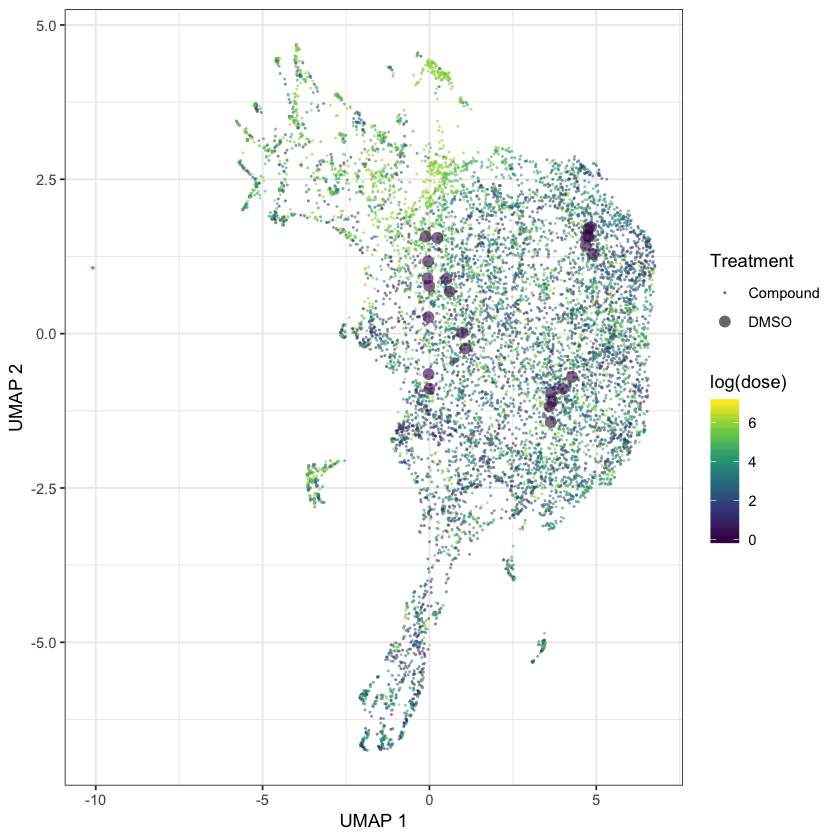

In [4]:
ggplot(cp_embedding_df,
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_dose_recode,
                   size = paste(Metadata_Treatment)),
               pch = 16,
               alpha = 0.6) +
    theme_bw() +
    scale_color_viridis_c(name = "log(dose)") +
    scale_size_discrete("Treatment",
                        range = c(0.5, 3)) +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path("figures",
                         paste0("umap_repurposing_cell_painting_dose_consensus_", consensus, ".png"))
ggsave(output_file, height = 5, width = 6, dpi = 500)

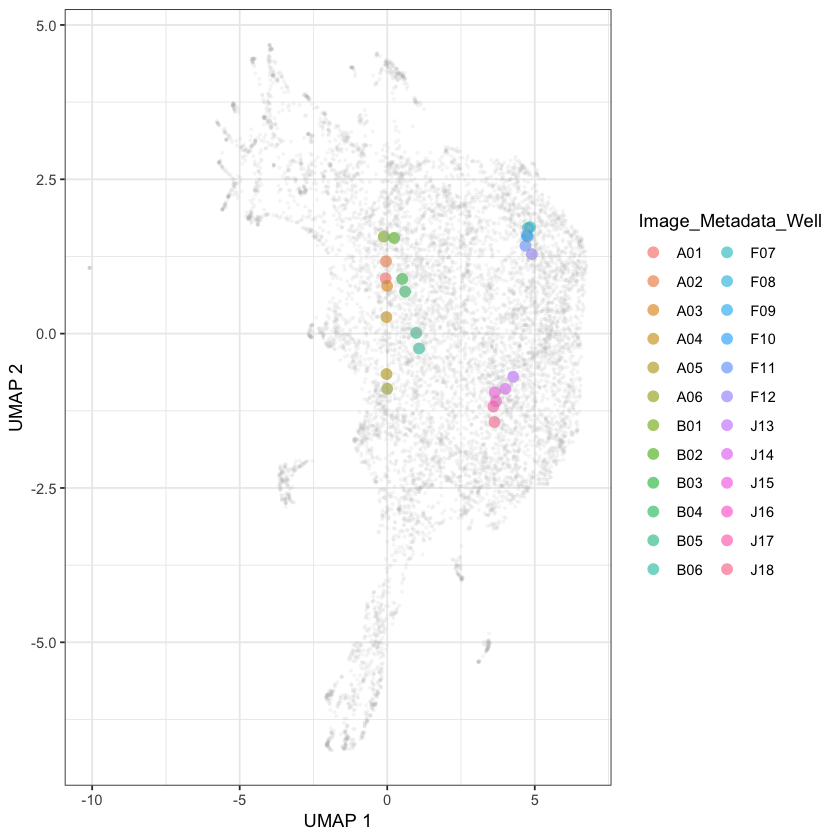

In [5]:
ggplot(cp_embedding_df %>% dplyr::filter(Metadata_Treatment == "DMSO"),
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Image_Metadata_Well),
               pch = 16,
               size = 3,
               alpha = 0.6) +
    geom_point(data = cp_embedding_df, color = "grey", alpha = 0.1, size = 0.5) +
    theme_bw() +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path("figures",
                         paste0("umap_repurposing_cell_painting_dose_consensus_dmso_", consensus, ".png"))

ggsave(output_file, height = 5, width = 6, dpi = 500)

## Certain Models had Better Performance in A549

We applied all models to the Drug Repurposing Set data.

Here, output visualizations of several of the top models.

![Performance Rank](../3.train/figures/ranked_models_A549.png)

In [6]:
visualize_model <- function(target_variable, legend_title, title = "none", dpi = 500, save_figure = TRUE) {
    plot_gg <- ggplot(cp_embedding_df, aes(x = umap_x, y = umap_y)) +
        geom_point(aes_string(color = target_variable),
                   size = 0.5,
                   pch = 16,
                   alpha = 0.6) +
        theme_bw() +
        scale_color_viridis_c(name = legend_title) +
        xlab("UMAP 1") +
        ylab("UMAP 2")
    
    if (title != "none") {
        plot_gg <- plot_gg + ggtitle(title)
    }
    if (save_figure) {
        output_file <- file.path("figures",
                                 paste0("umap_repurposing_cell_painting_",
                                        target_variable,
                                        "_consensus.png"))
        ggsave(output_file, height = 5, width = 6, dpi = dpi)
    }
    
    print(plot_gg)
}

In [7]:
# Load feature mapping
mapping_dir <- file.path("..", "1.generate-profiles", "data", "labels")
mapping_file <- file.path(mapping_dir, "feature_mapping_annotated.csv")
map_df <- readr::read_csv(mapping_file,
                          col_types = readr::cols(.default = readr::col_character()))

print(dim(map_df))
head(map_df, 3)

[1] 75  7


original_name updated_name feature_type measurement maria_thumbs_up assay
1 Row           well_row     metadata     NA          NA              NA   
2 Column        well_col     metadata     NA          NA              NA   
3 Plate Name    plate_name   metadata     NA          NA              NA   
  description
1 NA         
2 NA         
3 NA

## Visualizing Compound Dosage

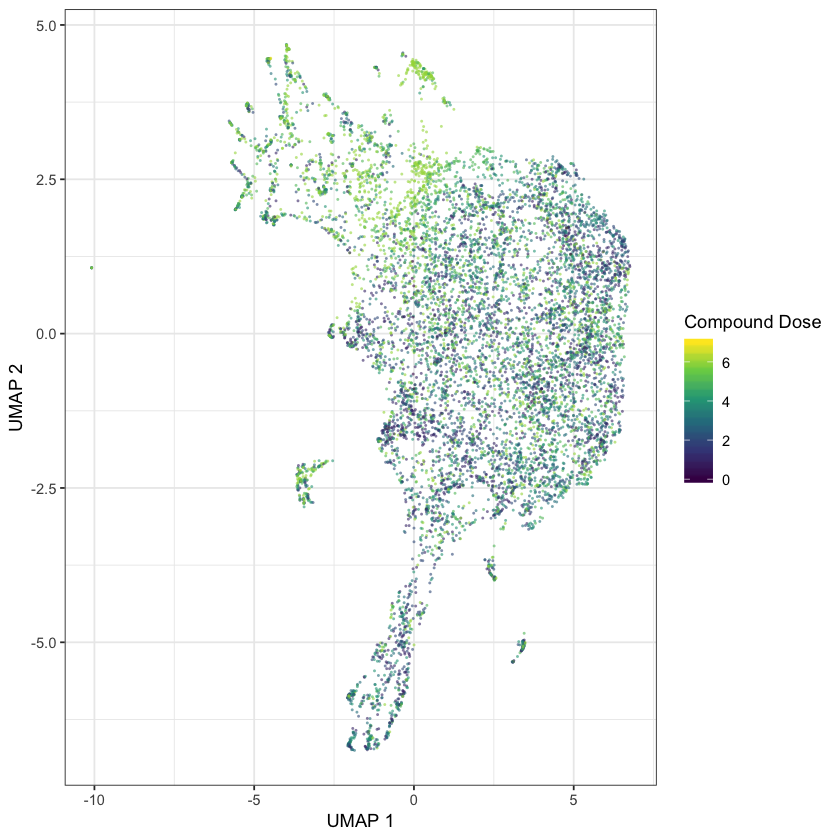

In [8]:
visualize_model(target_variable = "Metadata_dose_recode",
                legend_title = "Compound Dose") 

## Predicting Number of Live Cells (DRAQ7)

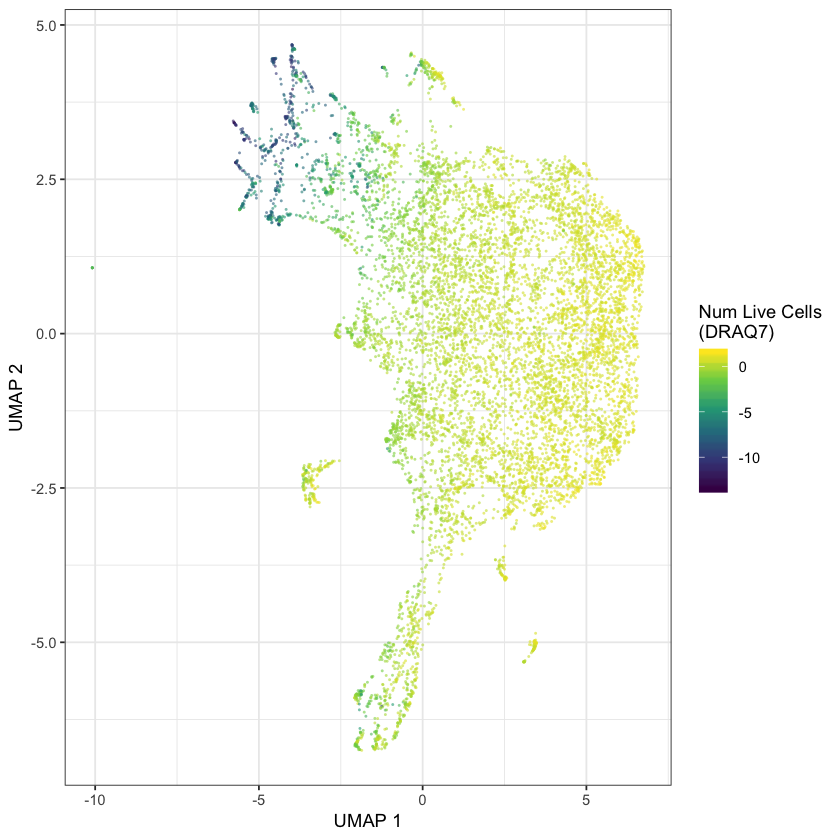

In [9]:
visualize_model(target_variable = "cell_health_modz_target_vb_num_live_cells",
                legend_title = "Num Live Cells\n(DRAQ7)")

## Predicting Live Width:Length (DRAQ7)

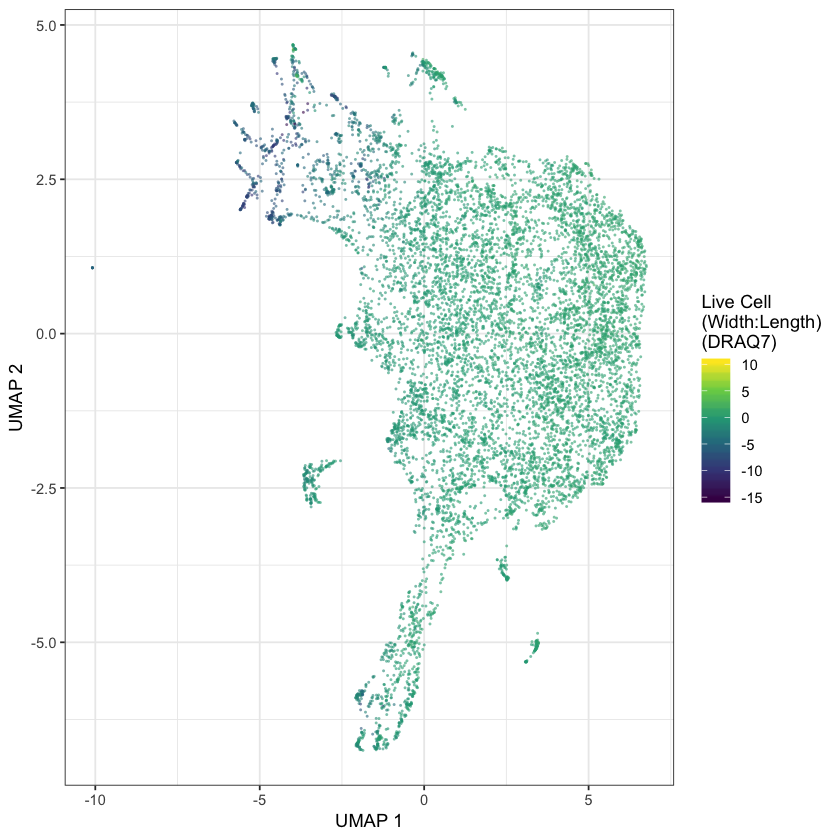

In [10]:
visualize_model(target_variable = "cell_health_modz_target_vb_live_cell_width_length",
                legend_title = "Live Cell\n(Width:Length)\n(DRAQ7)")

## Predicting Live Cell Roundness (DRAQ7)

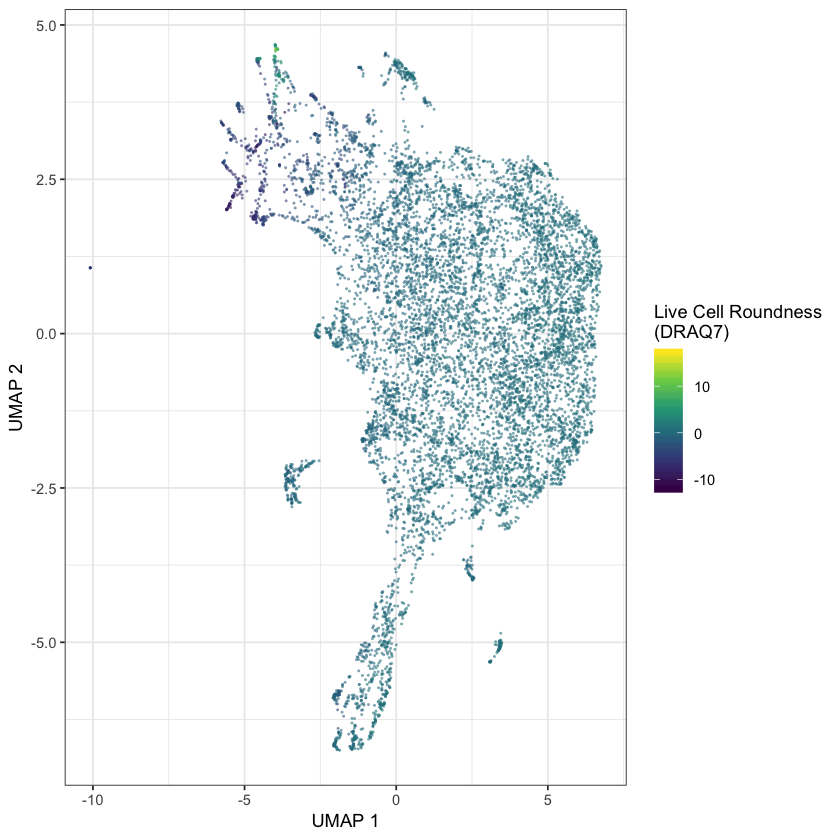

In [11]:
visualize_model(target_variable = "cell_health_modz_target_vb_live_cell_roundness",
                legend_title = "Live Cell Roundness\n(DRAQ7)")

## Predicting Number of Objects (Hoechst)

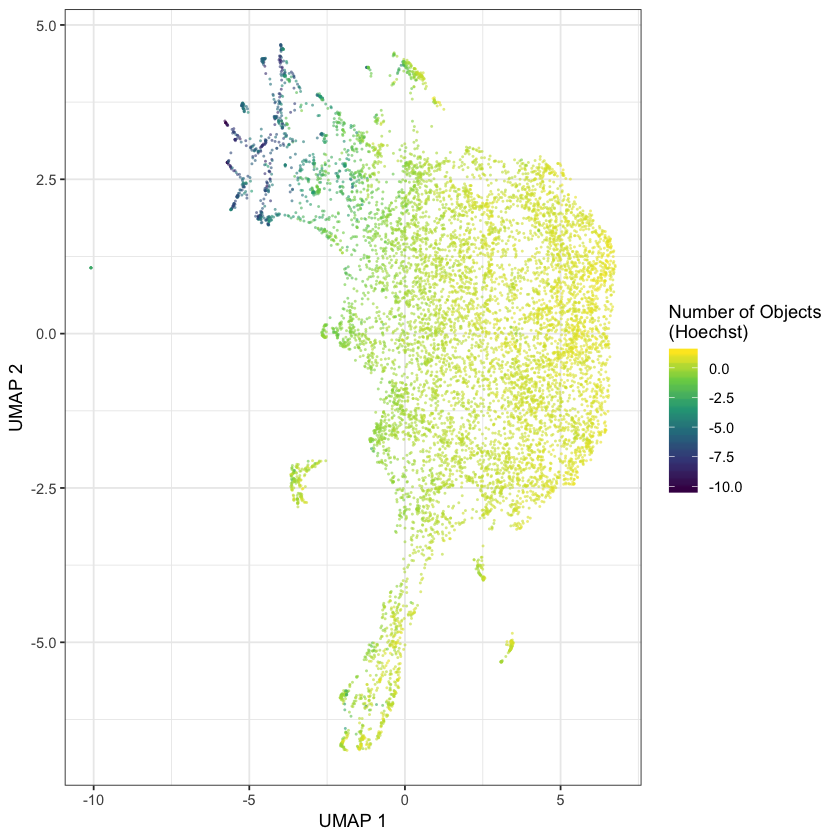

In [12]:
visualize_model(target_variable = "cell_health_modz_target_cc_all_n_objects",
                legend_title = "Number of Objects\n(Hoechst)")

## Predicting Live Cell Area (DRAQ7)

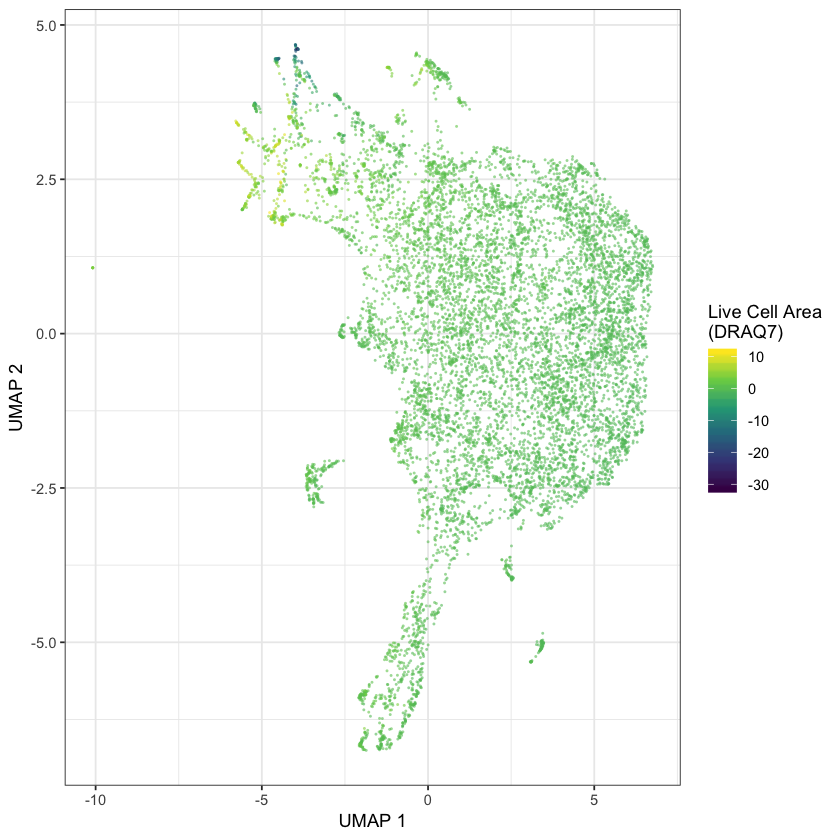

In [13]:
visualize_model(target_variable = "cell_health_modz_target_vb_live_cell_area",
                legend_title = "Live Cell Area\n(DRAQ7)")

## Predicting Number of Objects in Cell Cycle Stage (Hoechst)

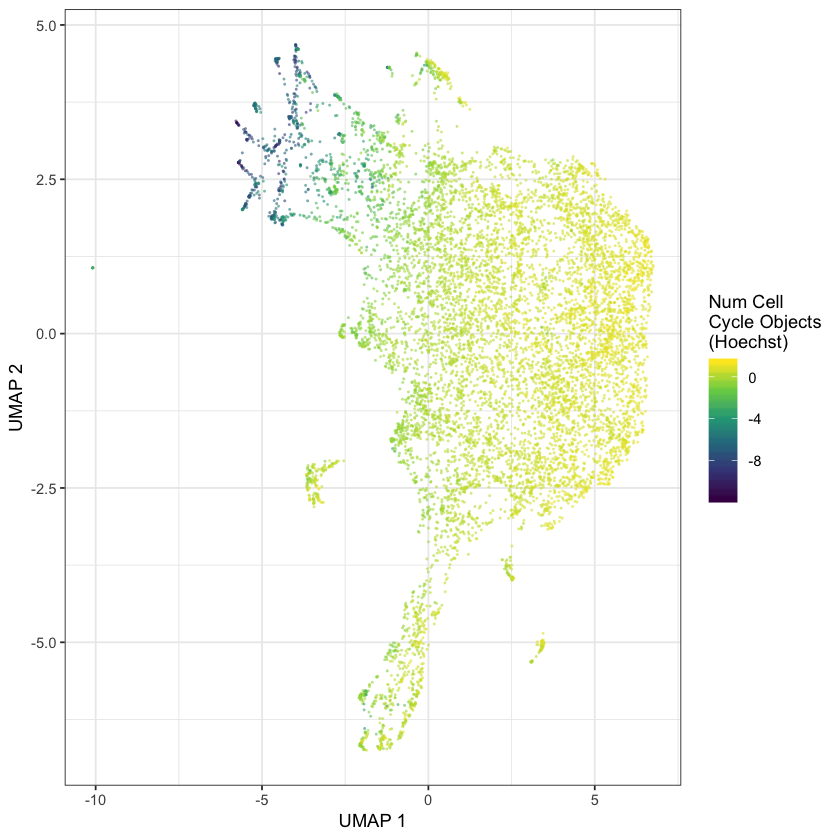

In [14]:
visualize_model(target_variable = "cell_health_modz_target_cc_cc_n_objects",
                legend_title = "Num Cell\nCycle Objects\n(Hoechst)")

## Predicting Number of Objects in G1 (Many Dyes)

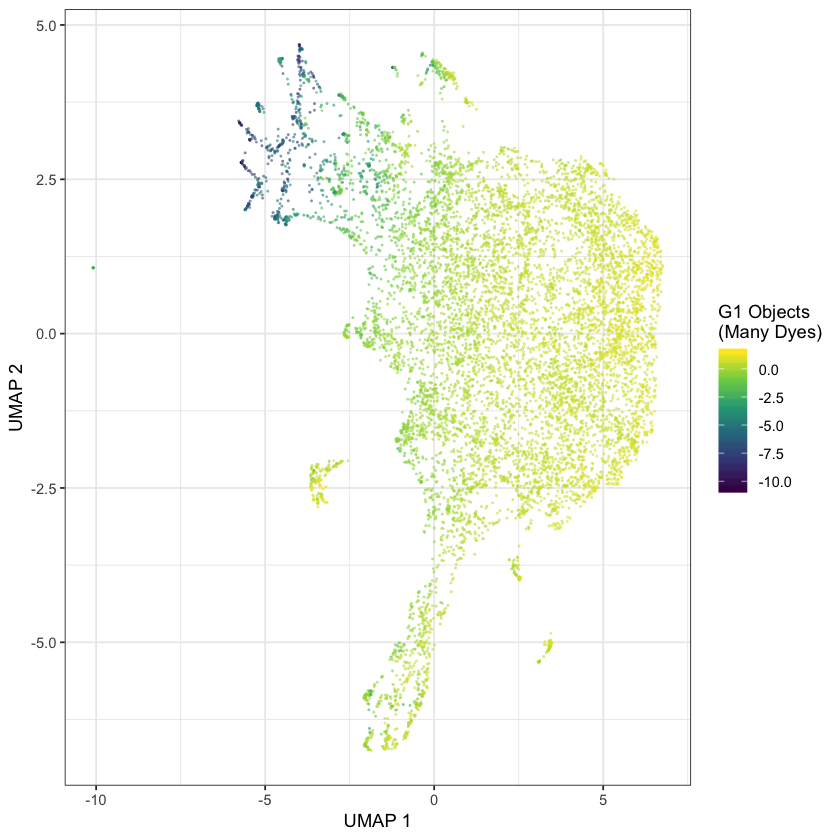

In [15]:
visualize_model(target_variable = "cell_health_modz_target_cc_g1_n_objects",
                legend_title = "G1 Objects\n(Many Dyes)")

## Predicting EdU positive intensity

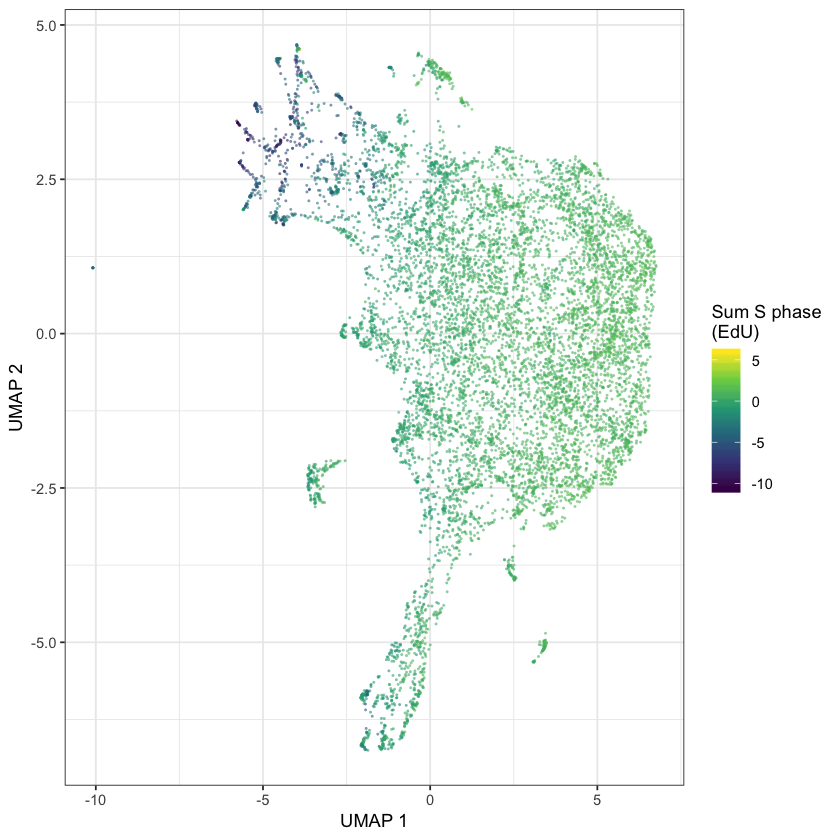

In [16]:
visualize_model(target_variable = "cell_health_modz_target_cc_edu_pos_alexa647_intensity_nucleus_area_sum",
                legend_title = "Sum S phase\n(EdU)")

## Predicting Numbe of EdU positive objects

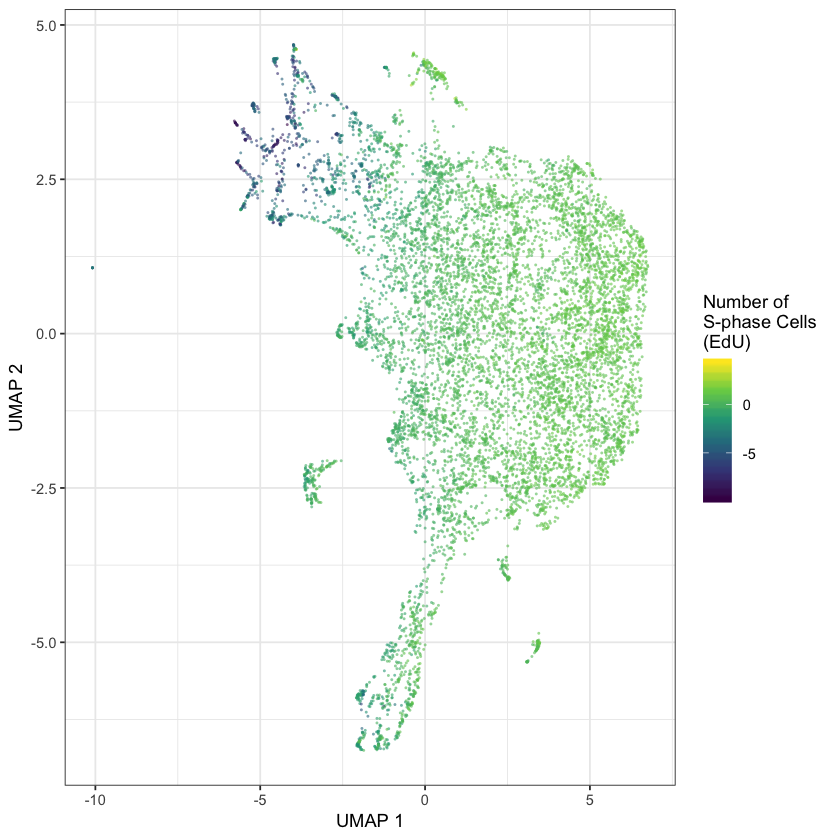

In [17]:
visualize_model(target_variable = "cell_health_modz_target_cc_edu_pos_n_objects",
                legend_title = "Number of\nS-phase Cells\n(EdU)")

## Predicting ROS (Caspase)

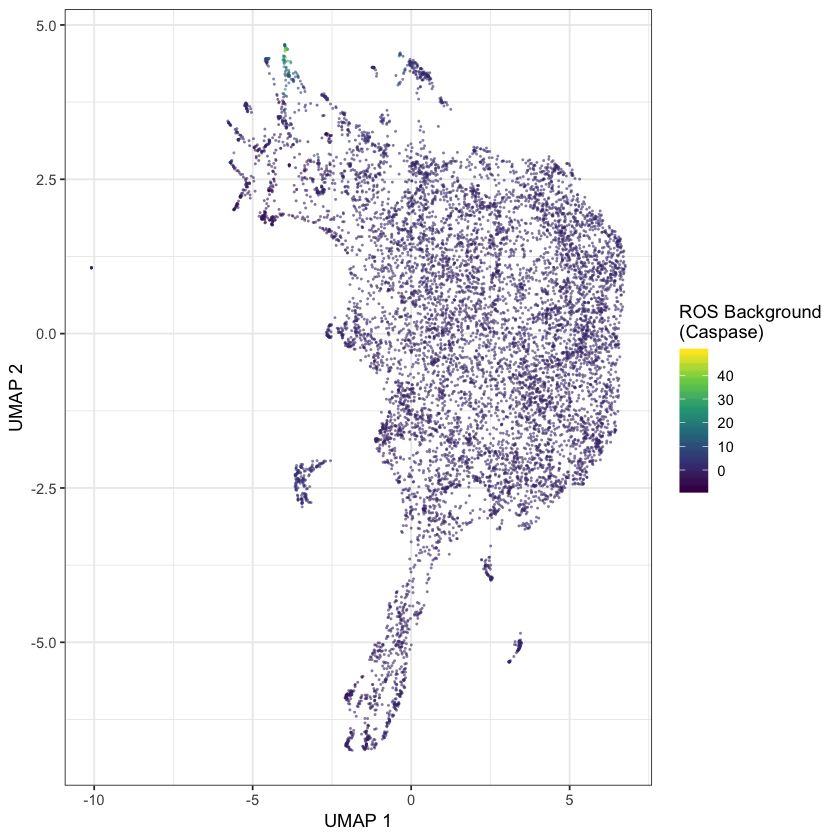

In [18]:
visualize_model(target_variable = "cell_health_modz_target_vb_ros_back_mean",
                legend_title = "ROS Background\n(Caspase)")

## Visualize All Cell Health Variables

In [19]:
cell_health_variables <- colnames(
    cp_embedding_df %>%
        dplyr::select(starts_with("cell_health_modz_target_"))
    )

length(cell_health_variables)

[1] 70

In [20]:
pdf_file <- file.path("figures",
                      paste0("repurposing_hub_umaps_consensus_", consensus, ".pdf"))
pdf(pdf_file, width = 5, height = 5, onefile = TRUE)

for (cell_health_variable in cell_health_variables) {
    umap_gg <- visualize_model(target_variable = cell_health_variable,
                               legend_title = "Prediction:",
                               title = cell_health_variable,
                               dpi = 200,
                               save_figure = FALSE)
}

dev.off()

pdf 
  2

## Visualize Model Scores on DMSO samples

In [21]:
# Set some plotting defaults
measurement_colors <- c(
    "apoptosis" = "#a6cee3",
    "cell_cycle_arrest" = "#1f78b4",
    "cell_viability" = "#b2df8a",
    "death" = "#33a02c",
    "dna_damage" = "#fb9a99", 
    "g1_arrest" = "#fdbf6f",
    "g2_arrest" = "#ff7f00",
    "g2_m_arrest" = "#005c8c",
    "mitosis" = "green",
    "other" = "black",
    "s_arrest" = "#cab2d6",
    "toxicity" = "#6a3d9a"
)

measurement_labels <- c(
    "apoptosis" = "Apoptosis",
    "cell_cycle_arrest" = "Cell Cycle Arrest",
    "cell_viability" = "Cell Viability",
    "death" = "Death",
    "dna_damage" = "DNA Damage", 
    "g1_arrest" = "G1 Arrest",
    "g2_arrest" = "G2 Arrest",
    "g2_m_arrest" = "G2/M Arrest",
    "mitosis" = "Mitosis",
    "other" = "Other",
    "s_arrest" = "S Arrest",
    "toxicity" = "Toxicity"
)

dye_colors <- c(
    "hoechst" = "#639B94",
    "edu" = "#E45242",
    "gh2ax" = "#E2C552",
    "ph3" = "#7B9C32",
    "hoechst_gh2ax" = "#535f52",
    "hoechst_edu" = "#73414b",
    "edu_gh2ax" = "#e37a48",
    "caspase" = "#F7B1C1",
    "draq" = "#FF6699",
    "draq_caspase" = "#7f4a72",
    "many_cell_cycle" = "#E9DFC3",
    "crispr_efficiency" = "black"
)

dye_labels <- c(
    "hoechst" = "Hoechst",
    "edu" = "EdU",
    "gh2ax" = "gH2AX",
    "ph3" = "pH3",
    "hoechst_gh2ax" = "Hoechst + gH2AX",
    "hoechst_edu" = "Hoechst + EdU",
    "edu_gh2ax" = "EdU + gH2AX",
    "caspase" = "Caspase 3/7",
    "draq" = "DRAQ7",
    "draq_caspase" = "DRAQ7 + Caspase 3/7",
    "many_cell_cycle" = "Cell Cycle (Many Dyes)",
    "crispr_efficiency" = "CRISPR Efficiency"
)

In [22]:
col_types <- readr::cols(
    .default = readr::col_character(),
    shuffle_false = readr::col_double(),
    shuffle_true = readr::col_double()
)

rank_file <- file.path("..", "4.apply", "repurposing_cellhealth_shiny", "data",
                       paste0("A549_ranked_models_regression_", consensus, ".tsv"))
model_rank_df <- readr::read_tsv(rank_file, col_types = col_types)

# Recode the target variable
model_rank_df$target <- paste0("cell_health_", consensus, "_target_", model_rank_df$target)

head(model_rank_df, 3)

metric target                                            original_name    
1 r_two  cell_health_modz_target_vb_live_cell_area         Live Cell Area   
2 r_two  cell_health_modz_target_vb_num_live_cells         # Live Cells     
3 r_two  cell_health_modz_target_vb_live_cell_width_length Live Width:Length
  feature_type measurement assay description          shuffle_false
1 viability    NA          draq  cell size            0.9053217    
2 viability    death       draq  number of live cells 0.8823729    
3 viability    NA          draq  width/length         0.8785727    
  shuffle_true
1  0.47400484 
2  0.09523037 
3 -0.02093986

In [23]:
dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment == "DMSO")

non_dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment != "DMSO")

In [24]:
head(dmso_embeddings_df)

Metadata_broad_sample Metadata_dose_recode Image_Metadata_Well umap_x      
1 DMSO                  0                    A01                 -0.053827103
2 DMSO                  0                    A02                 -0.042047790
3 DMSO                  0                    A03                 -0.004772268
4 DMSO                  0                    A04                 -0.027593931
5 DMSO                  0                    A05                 -0.024352454
6 DMSO                  0                    A06                 -0.001331586
  umap_y     cell_health_modz_target_cc_all_n_spots_mean
1  0.8958395 0.6718167                                  
2  1.1706266 0.3915019                                  
3  0.7724346 0.3549282                                  
4  0.2673147 0.3419190                                  
5 -0.6547579 0.3215402                                  
6 -0.8925548 0.2642505                                  
  cell_health_modz_target_cc_g1_high_n_spots_h2ax_mean
1 0.15532610                                          
2 0.08681399                                          
3 0.10519438                                          
4 0.12546969                                          
5 0.09147634                                          
6 0.11273124                                          
  cell_health_modz_target_cc_g1_n_objects
1 -0.2168923                             
2 -0.2183466                             
3 -0.1885586                             
4 -0.1380577                             
5 -0.1155374                             
6 -0.1790245                             
  cell_health_modz_target_vb_infection_percentage
1 0.05267429                                     
2 0.05295719                                     
3 0.05359726                                     
4 0.05357993                                     
5 0.05346629                                     
6 0.05367232                                     
  cell_health_modz_target_vb_ros_mean ⋯
1 0.71832937                          ⋯
2 0.67260323                          ⋯
3 0.40847760                          ⋯
4 0.29344421                          ⋯
5 0.24271416                          ⋯
6 0.08574267                          ⋯
  cell_health_modz_target_cc_edu_pos_high_n_spots_h2ax_mean
1 0.3476139                                                
2 0.3257952                                                
3 0.3327049                                                
4 0.2525760                                                
5 0.2332492                                                
6 0.1672838                                                
  cell_health_modz_target_cc_edu_pos_n_objects
1 -0.28955131                                 
2 -0.24904383                                 
3 -0.25918664                                 
4 -0.15860025                                 
5 -0.06015146                                 
6 -0.13548565                                 
  cell_health_modz_target_cc_g2_ph3_pos_n_spots_per_nucleus_area_mean
1 0.4410317                                                          
2 0.3559015                                                          
3 0.3620812                                                          
4 0.3290784                                                          
5 0.3315490                                                          
6 0.3107278                                                          
  cell_health_modz_target_cc_cc_ph3_pos_hoechst_mitosis_mean
1 -0.072923807                                              
2 -0.027440038                                              
3  0.005888628                                              
4 -0.020274915                                              
5 -0.041276467                                              
6 -0.043122722                                              
  cell_health_modz_target_cc_all_large_round_polyploid_mean
1 0.6444929           

In [25]:
std_dev_dmso_features <- apply(dmso_embeddings_df %>%
                               dplyr::select(matches("cell_health_modz_target")), 2, sd)
std_dev_compound_features <- apply(non_dmso_embeddings_df %>%
                                   dplyr::select(matches("cell_health_modz_target")), 2, sd)

In [26]:
std_dev_all_df <- dplyr::bind_cols(as.data.frame(std_dev_dmso_features),
                                   as.data.frame(std_dev_compound_features)) %>%
    dplyr::mutate(features = colnames(dmso_embeddings_df %>%
                                      dplyr::select(matches("cell_health_modz_target")))) %>%
    dplyr::left_join(model_rank_df, by = c("features" = "target")) 

good_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false > 0)

bad_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false <= 0)

std_dev_good_df <- good_performing %>%
    dplyr::mutate(performance_scaled = (
        good_performing$shuffle_false - min(good_performing$shuffle_false)
    ) / (
        max(good_performing$shuffle_false) - min(good_performing$shuffle_false)
    )
                  )

print(dim(std_dev_good_df))
head(std_dev_good_df, 2)

[1] 33 12


std_dev_dmso_features std_dev_compound_features
1 0.05006797            2.300026                 
2 0.39807707            1.627040                 
  features                                             metric
1 cell_health_modz_target_cc_g1_high_n_spots_h2ax_mean r_two 
2 cell_health_modz_target_cc_g1_n_objects              r_two 
  original_name                                            feature_type
1 G1 - Number of Spots per Area of Nucleus - Mean per Well cell_cycle  
2 G1 - Number of Objects                                   cell_cycle  
  measurement assay           description                            
1 dna_damage  many_cell_cycle In G1 cells: fraction of >3 gH2Ax spots
2 NA          many_cell_cycle number of G1 cells                     
  shuffle_false shuffle_true performance_scaled
1 0.09946021    -0.451515322 0.08218197        
2 0.82355749     0.007910003 0.90687645

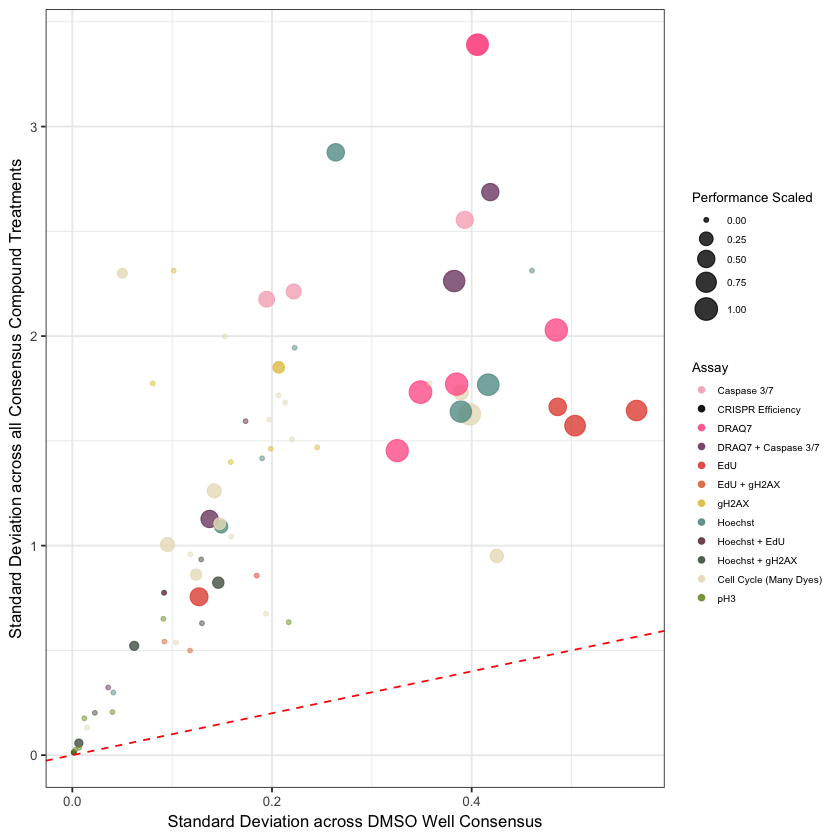

In [27]:
ggplot(std_dev_good_df, aes(x = std_dev_dmso_features, y = std_dev_compound_features)) +
    geom_point(aes(color = assay, size = performance_scaled),
               alpha = 0.8) +
    geom_point(data = bad_performing,
               aes(color = assay),
               size = 1,
               alpha = 0.5) +
    theme_bw() +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
    scale_color_manual(name = "Assay",
                       values = dye_colors,
                       labels = dye_labels) +
    scale_size_continuous(name = "Performance Scaled") + 
    xlab("Standard Deviation across DMSO Well Consensus") +
    ylab("Standard Deviation across all Consensus Compound Treatments") +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 10),
          strip.text = element_text(size = 6),
          legend.text = element_text(size = 6),
          legend.title = element_text(size = 8),
         legend.key.size = unit(0.4, "cm"))

output_file <- file.path("figures", "dmso_vs_compound_standard_deviation.png")
ggsave(output_file, height = 5, width = 6, dpi = 500)